In [84]:
import numpy as np
from numpy import linalg

def spline(ins,outs): # takes in a data set and returns a piecewise polynomial interpolation
    
    M = []
    aux = [0,0,2,6] # coefficients for the second derivative condition
    
    for i in range(len(ins)-1): # fills M with left endpoint continuity conditions
        row = np.zeros(4*(len(ins)-1))
        j = 0
        while j < 4:
            row[j+4*i] = sorted(ins)[i]**j
            j = j+1
        M.append(row)
    
    for i in range(len(ins)-1): # fills M with right endpoint continuity conditions
        row = np.zeros(4*(len(ins)-1))
        j = 0
        while j < 4:
            row[j+4*i] = sorted(ins)[i+1]**j
            j = j+1
        M.append(row)
        
    for i in range(len(ins)-2): # fills M with first derivative continuity conditions
        row = np.zeros(4*(len(ins)-1))
        for j in range(4):
            row[j+4*i] = j*sorted(ins)[i+1]**(j-1)
            row[j+4+4*i] = -j*sorted(ins)[i+1]**(j-1)
        M.append(row)
        
    
    for i in range(len(ins)-2): # fills M with second derivative continuity conditions
        row = np.zeros(4*(len(ins)-1))
        for j in range(4):
            row[j+4*i] = aux[j]*sorted(ins)[i+1]**(j-2)
            row[j+4+4*i] = -aux[j]*sorted(ins)[i+1]**(j-2)
        M.append(row)
        
    row = np.zeros(4*(len(ins)-1)) # sets the second derivative to zero at the left boundary of the data
    row[2] = 2
    row[3] = 2*ins[0]
    M.append(row)
    
    row = np.zeros(4*(len(ins)-1)) # sets the second derivative to zero at the right boundary of the data
    row[4*(len(ins)-1)-2] = 2
    row[4*(len(ins)-1)-1] = 2*sorted(ins)[len(ins)-1]
    M.append(row)
    
    b = [] # constructs the solution vector
    for i in range(len(ins)-1):
        b = np.append(b,[outs[i],outs[i+1]])
    b = np.append(b,np.zeros(4*(len(ins)-1)-2*len(ins)+2))

    x = linalg.solve(M,b) # solves the linear equation for the coefficients on the interpolating cubics
    
    return(x) # the coefficients for the interpolating cubics
    
def poly(ins,outs,x): # returns the value of the polynomial defined by spline
    pos = 0
    while x > sorted(ins)[pos] and pos < len(ins)-2:
        pos = pos + 1
    polypiece = 0 
    for i in range(4):
        polypiece = polypiece + spline(ins,outs)[4*pos+i]*x**i
    
    return(polypiece)

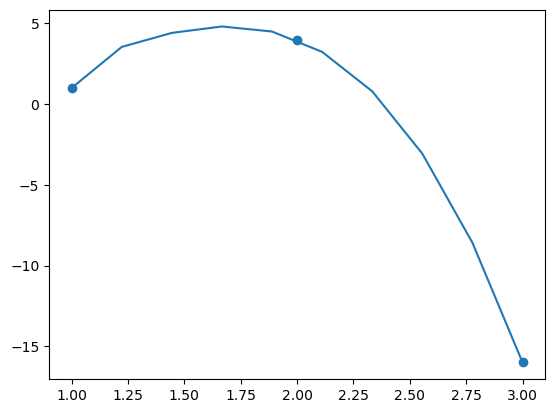

In [89]:
import matplotlib.pyplot as plt

ins = [1,2,3]
outs = [1,4,-16]

x = np.linspace(sorted(ins)[0],sorted(ins)[len(ins)-1],10)
y = np.array([])
for i in range(len(x)):
    y = np.append(y,[poly(ins,outs,x[i])])

fig, ax = plt.subplots()

ax.scatter(ins,outs)
ax.plot(x,y)



In [81]:
spline([1,2,3],[1,4,9])

[array([1., 1., 1., 1., 0., 0., 0., 0.]), array([0., 0., 0., 0., 1., 2., 4., 8.]), array([1., 2., 4., 8., 0., 0., 0., 0.]), array([ 0.,  0.,  0.,  0.,  1.,  3.,  9., 27.]), array([  0.,   1.,   4.,  12.,   0.,  -1.,  -4., -12.]), array([  0.,   0.,   2.,  12.,   0.,   0.,  -2., -12.]), array([0., 0., 2., 2., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 2., 6.])]
[1. 4. 4. 9. 0. 0. 0. 0.]


array([-1.25  ,  2.25  , -0.1875,  0.1875, -2.25  ,  3.75  , -0.9375,
        0.3125])